In [1]:
import win32com.client
import pandas as pd
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Visum = win32com.client.Dispatch('Visum.Visum.18')

In [3]:
Visum.LoadVersion('D:/001_Projects/02 - BCMM IPTN/3 VISUM Model/SharedData/BCMM PuT Assignment Corrected.ver')

In [4]:
disc = Visum.Net.Matrices.ItemByKey(2).GetValues()
c = Visum.Net.Matrices.ItemByKey(1000).GetValues()
p = Visum.Net.Matrices.ItemByKey(1001).GetValues()
w = Visum.Net.Matrices.ItemByKey(1002).GetValues()


In [5]:
disc = list(itertools.chain(disc))
c = list(itertools.chain(c))
p = list(itertools.chain(p))
w = list(itertools.chain(w))


In [6]:
disc2 = [item for t in disc for item in t] 
c2 = [item for t in c for item in t] 
p2 = [item for t in p for item in t] 
w2 = [item for t in w for item in t] 


In [7]:
df = pd.DataFrame([disc2, c2, w2, p2]).transpose()
df.columns = ['disc', 'c', 'w', 'p']
df = df.loc[(df.disc <= 1000)]
df['total'] = df.c + df.w + df.p
df['totdis'] = df.disc * df.total
df['totdisc'] = df.disc * df.c
df['totdisw'] = df.disc * df.w
df['totdisp'] = df.disc * df.p

summary = {}
summary = {'average distance' : df['totdis'].sum() / df['total'].sum(), 
           'average distance car' : df['totdisc'].sum() / df['c'].sum(), 
           'average distance pedestrian' : df['totdisw'].sum() / df['w'].sum(), 
           'average distance transit' : df['totdisp'].sum() / df['p'].sum(), 
           'mode % car' : df['c'].sum() / df['total'].sum()*100, 
           'mode % pedestrian' : df['w'].sum() / df['total'].sum()*100, 
           'mode % transit' : df['p'].sum() / df['total'].sum()*100}

df['disc'] = pd.cut(df.disc,bins=range(0, 40, 1))
df = df.groupby(['disc']).sum().reset_index()
df = df[['disc', 'c', 'w', 'p']]


In [8]:
summary

{'average distance': 8.818904280477422,
 'average distance car': 11.409696940267802,
 'average distance pedestrian': 4.65361704645828,
 'average distance transit': 9.265677955590718,
 'mode % car': 23.495914572131998,
 'mode % pedestrian': 20.6096702296613,
 'mode % transit': 55.894415198206715}

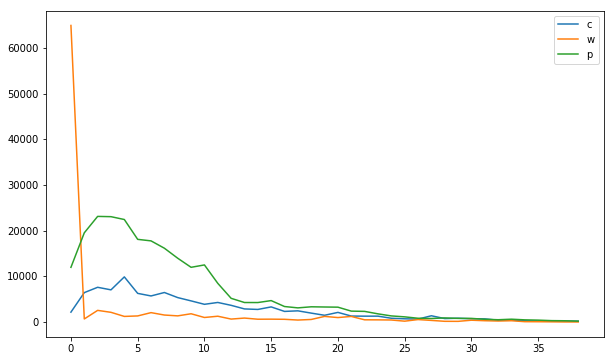

In [9]:
ax = df.plot(figsize=(10,6))

In [121]:
df.to_csv('D:\\001_Projects\\01 - GIPTN\\04 - Macro Model\\TLD2.csv')

In [20]:
df

,disc,c,w,p
0,"(0, 1]",2175.380090,64914.921732,11981.594054
1,"(1, 2]",6447.174401,685.037596,19535.246565
2,"(2, 3]",7614.561283,2562.045990,23128.793318
3,"(3, 4]",7053.406968,2135.701072,23068.684319
4,"(4, 5]",9891.769750,1240.240464,22447.125589
5,"(5, 6]",6283.987717,1346.015197,18105.379772
6,"(6, 7]",5719.445095,2067.625922,17771.919726
7,"(7, 8]",6472.396060,1542.863161,16164.812126
8,"(8, 9]",5359.236442,1359.843226,13971.830374
9,"(9, 10]",4638.632812,1822.517707,11987.138413
